In [0]:
# import library tensorflow
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
# check version  tensorflow
print(tf.__version__)

2.2.0


In [20]:
# upload or extract file to folder /tmp
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-06-09 05:04:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.46MB/s    in 48s     

2020-06-09 05:05:22 (6.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [24]:
# extract file zip on folder /tmp
import zipfile,os
import shutil

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

# create dir validation
os.mkdir('/tmp/val')

base_dir = '/tmp/'

# create folder train and validation 
train_dir = os.path.join(base_dir, 'rockpaperscissors')
validation_dir = os.path.join(base_dir, 'val')

# check length of data
print('-----------------------')
print('Total Data Paper :',len(os.listdir(os.path.join(base_dir, 'rockpaperscissors/paper'))))
print('Total Data rock :',len(os.listdir(os.path.join(base_dir, 'rockpaperscissors/rock'))))
print('Total Data scissors :',len(os.listdir(os.path.join(base_dir, 'rockpaperscissors/scissors'))))
print('-----------------------')

-----------------------
Total Data Paper : 712
Total Data rock : 726
Total Data scissors : 750
-----------------------


In [0]:
# remove folder or file not necessary
!rm -rf /tmp/rockpaperscissors/rps-cv-images/
!rm /tmp/rockpaperscissors/README_rpc-cv-images.txt

In [0]:
# create directory for data training and validation
train_paper_dir= os.path.join(train_dir, 'paper')
train_rock_dir= os.path.join(train_dir, 'rock')
train_scissors_dir= os.path.join(train_dir, 'scissors')

validation_paper_dir= os.path.join(validation_dir, 'paper')
validation_rock_dir= os.path.join(validation_dir, 'rock')
validation_scissors_dir= os.path.join(validation_dir, 'scissors')


In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.2, # split 20% data for validation
)

In [29]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    # 1 layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2 layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3 Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4 Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flattening Process
    tf.keras.layers.Flatten(),
    # Dropout
    tf.keras.layers.Dropout(0.5),
    # 5 Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

In [32]:
result = model.fit(
            train_generator,
            steps_per_epoch=25,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=3,
            verbose=1)

Epoch 1/30
25/25 [==============================] - 14s 552ms/step - loss: 1.2469 - accuracy: 0.3568 - val_loss: 1.0415 - val_accuracy: 0.4333
Epoch 2/30
25/25 [==============================] - 13s 535ms/step - loss: 1.0386 - accuracy: 0.4800 - val_loss: 0.9942 - val_accuracy: 0.5333
Epoch 3/30
25/25 [==============================] - 13s 514ms/step - loss: 0.9521 - accuracy: 0.5851 - val_loss: 0.6405 - val_accuracy: 0.8667
Epoch 4/30
25/25 [==============================] - 13s 530ms/step - loss: 0.5555 - accuracy: 0.8120 - val_loss: 0.3057 - val_accuracy: 0.9000
Epoch 5/30
25/25 [==============================] - 13s 513ms/step - loss: 0.5410 - accuracy: 0.8091 - val_loss: 0.3529 - val_accuracy: 0.9000
Epoch 6/30
25/25 [==============================] - 13s 538ms/step - loss: 0.4585 - accuracy: 0.8280 - val_loss: 0.6923 - val_accuracy: 0.7667
Epoch 7/30
25/25 [==============================] - 13s 509ms/step - loss: 0.4513 - accuracy: 0.8672 - val_loss: 0.4916 - val_accuracy: 0.7667

**Predicting Images**

Using TensorFlow backend.


Saving scissors.png to scissors.png
scissors.png
[[1. 0. 0.]]


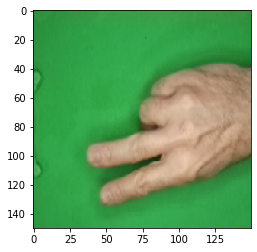

In [33]:
# import library predicting images
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes)

**Accuracy and Lossing (Validation & Training)**

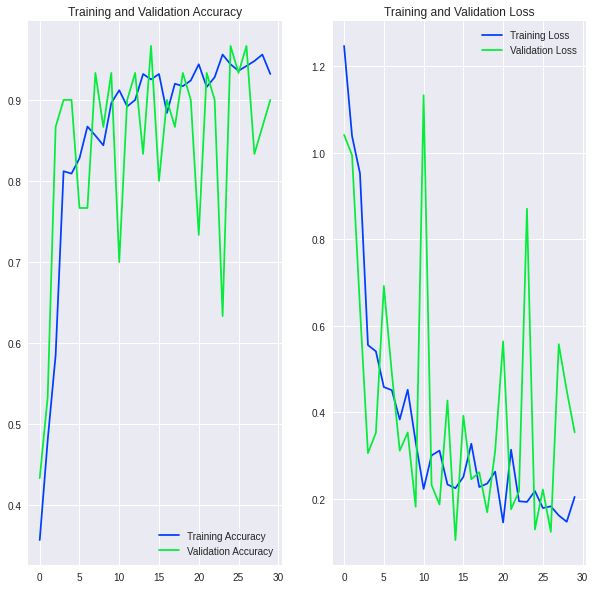

In [45]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(30)

plt.style.use('seaborn-bright')

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
